# AML Homework 1 PART 2 The Titanic Disaster

## Question 1

##### Join the Titanic: Machine Learning From Disaster competition on Kaggle. Download and pre- process the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import e, log
from sklearn.metrics import f1_score
from numpy.random import rand
from sklearn.preprocessing import normalize
import csv

train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

#Data-Preprocessing
#Did some tweaking and I found these columns to be quite useless, let's disgard them
train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'], axis=1, inplace=True)
test.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'], axis=1, inplace= True)

#Upon investigaing the data, there are a lot of null values, let's fill them with median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
#Label-encode sex column
def label_encode(data):
    tmp = []
    for line in data:
        if line == 'male':
            tmp.append(0)
        elif line == 'female':
            tmp.append(1)     
    return tmp

x_train= train.iloc[:, 1:]
y_train= train['Survived'].values.reshape(-1,1).astype(int)

label_List1 = label_encode(x_train['Sex'])
label_List2 = label_encode(test['Sex'])
x_train.drop('Sex', axis = 1, inplace = True)
x_train['Sex'] = label_List1
test.drop('Sex', axis = 1, inplace = True)
test['Sex'] = label_List2

#Feature Normalization
features= ['Age', 'SibSp', 'Fare']

x_train[features] = normalize(x_train[features])
test[features] = normalize(test[features])

## Question 2

##### Using logistic regression, try to predict whether a passenger survived the disaster. Choose the features (or combinations of features) you would like to use or ignore, provided you justify your choice.

Accuracy:  0.7845117845117845
F1-Score:  0.710843373493976


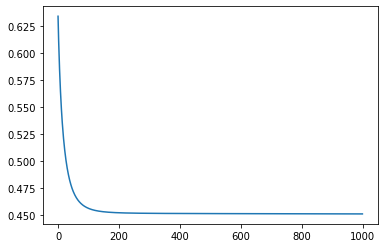

In [2]:
class Logistic:
 
    def __init__(self, x, y, learning_rate, iteration):
        self.x = x
        self.y = y
        self.lr = learning_rate
        self.iteration = iteration
        
    def sigmoid (self,z):
        return 1/(1 + e**(-z))
    
    def cost_function(self, x, y, weights):                 
        z = np.dot(x, weights)
        predict = y * np.log(self.sigmoid(z)) + (1-y) * np.log(1-self.sigmoid(z))
        return -np.sum(predict) / len(self.x)
    
    def fit(self): 
        # X: N*Feature
        #Weight: Feature*2
        cost = []
        weights = np.zeros((self.x.shape[1],1))
        N = len(self.x)
                 
        for i in range(iteration):        

            y_hat = self.sigmoid(np.dot(self.x, weights))
            y_true = self.y
            weights -= learning_rate * np.dot(self.x.T,  (y_hat - y_true)) / N            
            cost.append(self.cost_function(self.x, self.y, weights)) 
            
        plt.plot(cost)
        self.weights = weights
        y_pred = self.sigmoid(np.dot(self.x, weights))
        return weights, cost
    
    def predict(self,data): 
        # Predicting with sigmoid function
        z = np.dot(data, self.weights)
        result = [int(i>0.5) for i in self.sigmoid(z)]
        
        return np.array(result)
        
    def evaluate(self):
        y_pred = self.predict(self.x)
        y = self.y.reshape(-1,)
        f1 = f1_score(self.y, y_pred )
        acc = np.sum(y==y_pred)/self.y.shape[0]
        print("Accuracy: ",acc)
        print("F1-Score: ",f1)

iteration = 1000
learning_rate = 0.5
model_Logistic = Logistic(x_train,y_train,learning_rate, iteration)
weights, cost_list = model_Logistic.fit()

model_Logistic.evaluate()


## Question 3

##### Train your classifier using all of the training data, and test it using the testing data. Submit your results to Kaggle.

In [3]:
result = model_Logistic.predict(test)
with open("gender_submission.csv","w") as f:
    writer = csv.writer(f)
    row = ["PassengerId", "Survived"]
    writer.writerow(row)
    for i in range(len(test)):
        row = [i+892, result[i]]
        writer.writerow(row)

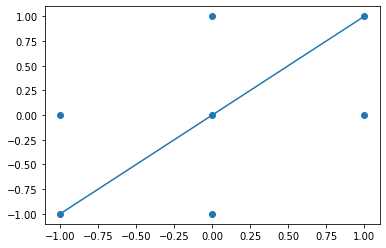

In [9]:
x_coordinates = [-1, -1, 0,0,0,1,1]
y_coordinates = [-1, 0, -1,0,1,0,1]
#(−1, −1), (−1, 0), (0, −1), (0, 0), (0, 1), (1, 0), (1, 1)
plt.scatter(x_coordinates, y_coordinates)
plt.plot([-1,1], [-1,1])